In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from findlay2025a import core
from findlay2025a.constants import Files
from findlay2025a.constants import Experiments as Exps
import numpy as np

from ecephys import utils

In [ ]:
nb = core.get_project("seahorse")
df = pd.read_parquet(nb.get_project_file(Files.EXPORTED_CONDITION_MEASURES))

In [14]:
df["condition"].unique()

array(['Early.BSL.NREM', 'Early.NOD.Wake', 'Early.REC.NREM',
       'Late.BSL.NREM', 'Late.REC.NREM', 'Early.EXT.Wake',
       'Late.EXT.Wake', 'Early.SD.Wake', 'Late.SD.Wake', 'NOD.Wake',
       'SD.Wake', 'COW.Wake', 'Late.COW.Wake', 'EXT.Wake', 'CTN.Wake'],
      dtype=object)

In [15]:
experiment_palette = sns.color_palette("Dark2_r", 8)
experiment_palette = dict(zip(["Novelty", "Locomotion", "Dual"], experiment_palette))

In [64]:
def do_plot(
    measures: pd.DataFrame, yvar: str, conditions: tuple[str], ylabel: str = None
) -> tuple[plt.Figure, plt.Axes]:
    fig, axes = plt.subplots(1, 3, figsize=(6, 4), sharex=True, sharey=True)
    for ax, exp in zip(axes, experiment_palette.keys()):
        sns.boxplot(
            measures[measures["experiment"] == exp],
            x="condition",
            order=conditions,
            y=yvar,
            color=experiment_palette[exp],
            fill=False,
            legend=False,
            saturation=1,
            fliersize=0,
            ax=ax,
        )
        sns.stripplot(
            measures[measures["experiment"] == exp],
            x="condition",
            order=conditions,
            y=yvar,
            color="k",
            s=4,
            ax=ax,
            legend=False,
        )
        ax.set_xlabel("")
        ax.set_xticklabels(conditions, rotation=45)
        if ylabel is not None:
            ax.set_ylabel(ylabel)
        ax.set_title(exp, weight="bold", color=experiment_palette[exp])

    fig.tight_layout()
    return fig, axes

/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/1914124675.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)
/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/1914124675.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)
/home/gfindlay/projects/ece/

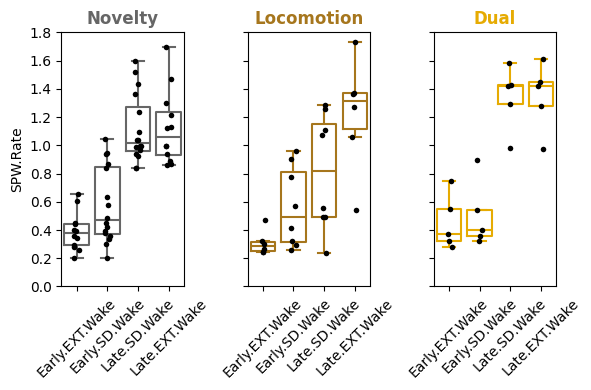

In [75]:
fig, axes = do_plot(
    df, "SPW.Rate", ("Early.EXT.Wake", "Early.SD.Wake", "Late.SD.Wake", "Late.EXT.Wake")
)
for ax in axes:
    ax.set_ylim(0, 1.8)
fig.savefig(
    nb.get_project_file("figures/spw_rate_wake_by_experiment.png"),
    dpi=600,
    bbox_inches="tight",
)

/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/1914124675.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)
/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/1914124675.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)
/home/gfindlay/projects/ece/

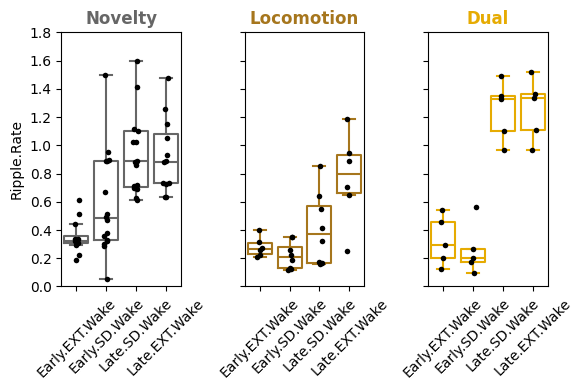

In [76]:
fig, axes = do_plot(
    df,
    "Ripple.Rate",
    ("Early.EXT.Wake", "Early.SD.Wake", "Late.SD.Wake", "Late.EXT.Wake"),
)
for ax in axes:
    ax.set_ylim(0, 1.8)
fig.savefig(
    nb.get_project_file("figures/ripple_rate_wake_by_experiment.png"),
    dpi=600,
    bbox_inches="tight",
)

/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/3596983513.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)


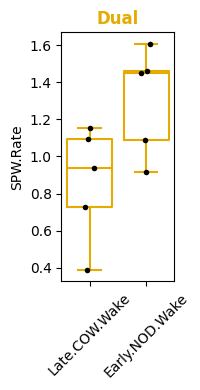

In [85]:
exp = "Dual"
conditions = ("Late.COW.Wake", "Early.NOD.Wake")
yvar = "SPW.Rate"
ylabel = None
measures = df
fig, ax = plt.subplots(1, 1, figsize=(2, 4))
sns.boxplot(
    measures[measures["experiment"] == exp],
    x="condition",
    order=conditions,
    y=yvar,
    color=experiment_palette[exp],
    fill=False,
    legend=False,
    saturation=1,
    fliersize=0,
    ax=ax,
)
sns.stripplot(
    measures[measures["experiment"] == exp],
    x="condition",
    order=conditions,
    y=yvar,
    color="k",
    s=4,
    ax=ax,
    legend=False,
)
ax.set_xlabel("")
ax.set_xticklabels(conditions, rotation=45)
if ylabel is not None:
    ax.set_ylabel(ylabel)
ax.set_title(exp, weight="bold", color=experiment_palette[exp])
fig.tight_layout()

fig.savefig(
    nb.get_project_file("figures/spw_rate_late_cow_vs_early_nod_dual.png"),
    dpi=600,
    bbox_inches="tight",
)

/home/gfindlay/projects/ece/gfys_workspace/.venv/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipykernel_3076971/3146865519.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45)


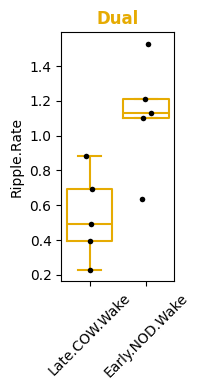

In [ ]:
exp = "Dual"
conditions = ("Late.COW.Wake", "Early.NOD.Wake")
yvar = "Ripple.Rate"
ylabel = None
measures = df
fig, ax = plt.subplots(1, 1, figsize=(2, 4))
sns.boxplot(
    measures[measures["experiment"] == exp],
    x="condition",
    order=conditions,
    y=yvar,
    color=experiment_palette[exp],
    fill=False,
    legend=False,
    saturation=1,
    fliersize=0,
    ax=ax,
)
sns.stripplot(
    measures[measures["experiment"] == exp],
    x="condition",
    order=conditions,
    y=yvar,
    color="k",
    s=4,
    ax=ax,
    legend=False,
)
ax.set_xlabel("")
ax.set_xticklabels(conditions, rotation=45)
if ylabel is not None:
    ax.set_ylabel(ylabel)
ax.set_title(exp, weight="bold", color=experiment_palette[exp])
fig.tight_layout()

fig.savefig(
    nb.get_project_file("figures/ripple_rate_late_cow_vs_early_nod_dual.png"),
    dpi=600,
    bbox_inches="tight",
)

# Coupling

In [ ]:
nb = core.get_project("seahorse")
spws = pd.read_parquet(nb.get_project_file(Files.CLASSIC_SPWS))
rips = pd.read_parquet(nb.get_project_file(Files.RIPPLES))

In [ ]:
def get_curve(spws: pd.Series, rips: pd.Series) -> tuple[np.ndarray, np.ndarray]:
    lo = min(spws["ripple_dB"].quantile(0.01), rips["dB"].quantile(0.01))
    hi = max(spws["ripple_dB"].quantile(0.99), rips["dB"].quantile(0.99))
    x = np.linspace(lo, hi, 1000)
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = len(
            spws[(spws["ripple_dB"] < x[i]) & (spws["ripple_count"] == 0)]
        ) / len(spws)
    return x, y


def plot_cutoff_lines(
    ax: plt.Axes, x: np.ndarray, y: np.ndarray, lines=[0.05, 0.1, 0.15]
):
    for cut in lines:
        i = utils.find_nearest(y, cut)
        ax.axvline(x[i], color="k", linestyle="--", linewidth=0.5)
        ax.text(
            x[i],
            0.99,
            f"{int(cut * 100)}%",
            color="r",
            fontsize=8,
            ha="right",
            va="top",
            rotation=90,
            transform=ax.get_xaxis_transform(),
        )

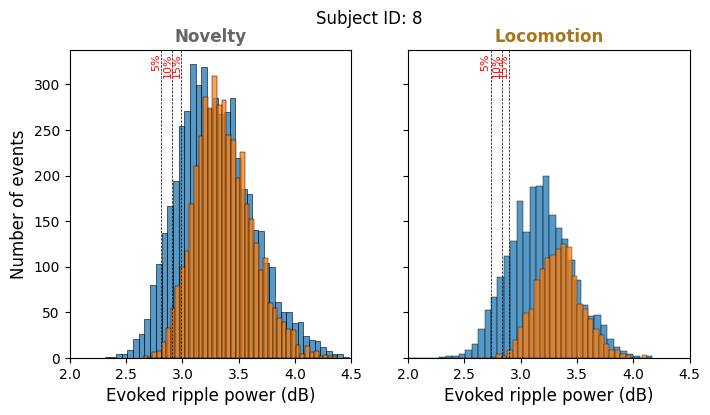

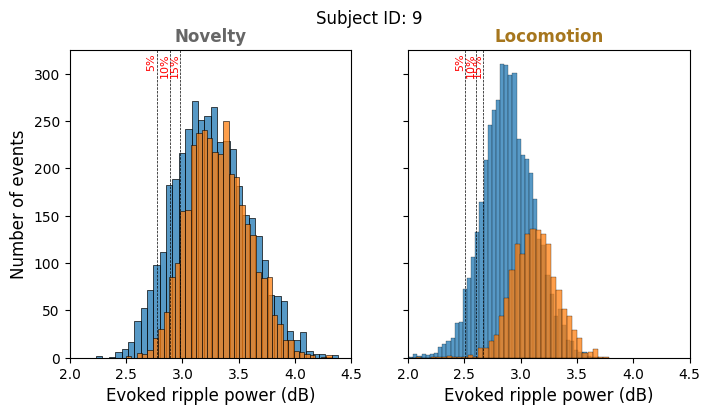

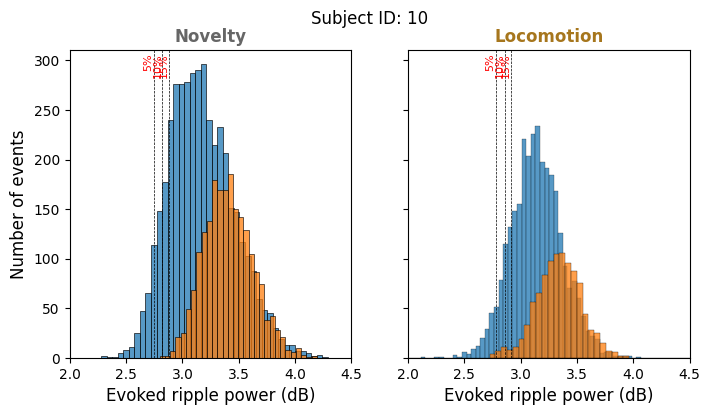

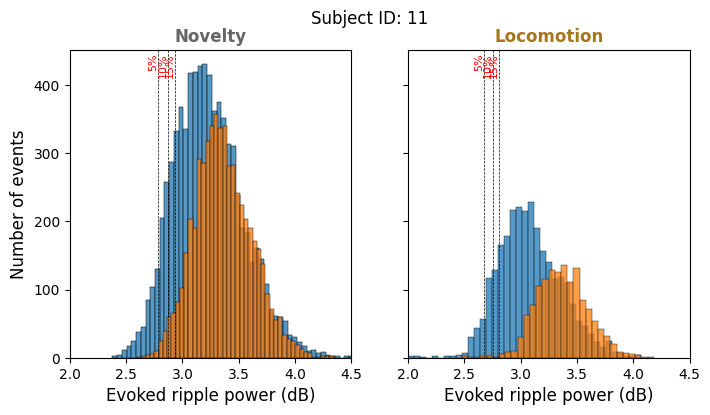

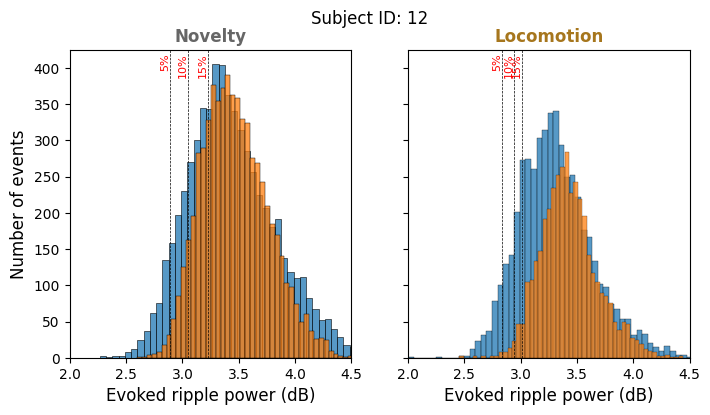

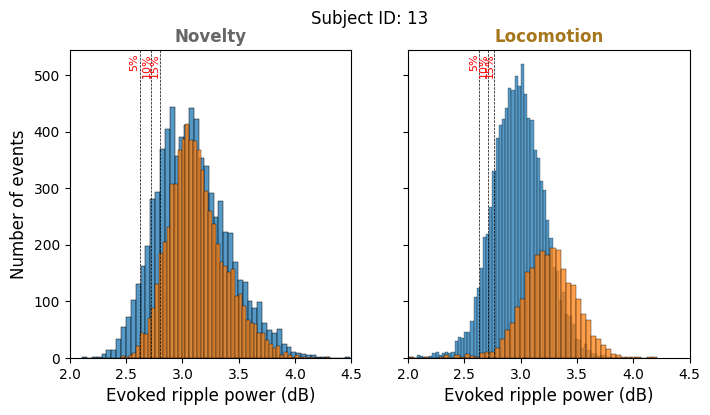

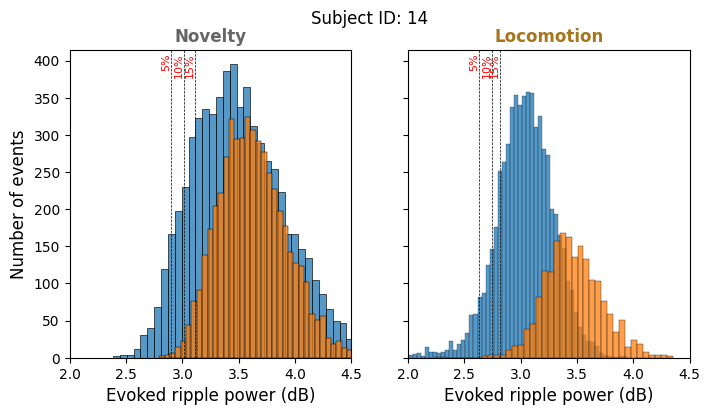

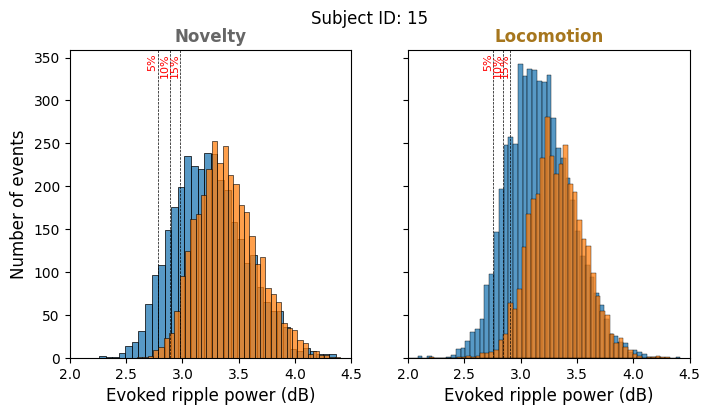

In [ ]:
nod_subjects = list(
    s for s, e in core.yield_subject_name_experiment_pairs(experiments=[Exps.NOD])
)
cow_subjects = list(
    s for s, e in core.yield_subject_name_experiment_pairs(experiments=[Exps.COW])
)
subjects = list(set(nod_subjects) & set(cow_subjects))
subjects = [s for s in nod_subjects if s in subjects]

for subject in subjects:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    for ax, experiment in zip(axes, [Exps.NOD, Exps.COW]):
        _spws = spws[
            (spws["subject"] == subject)
            & (spws["experiment"] == experiment)
            & spws["sd_wake"]
        ]
        _rips = rips[
            (rips["subject"] == subject)
            & (rips["experiment"] == experiment)
            & rips["sd_wake"]
        ]
        sns.histplot(_spws, x="ripple_dB", ax=ax)
        sns.histplot(_rips, x="dB", ax=ax)
        x, y = get_curve(_spws, _rips)
        plot_cutoff_lines(ax, x, y)
        ax.set_xlim(2.0, 4.5)
        ax.set_xlabel("Evoked ripple power (dB)", fontsize=12)
        ax.set_ylabel("Number of events", fontsize=12)
        experiment_name = {
            Exps.NOD: "Novelty",
            Exps.COW: "Locomotion",
        }[experiment]
        ax.set_title(
            experiment_name, weight="bold", color=experiment_palette[experiment_name]
        )
    subject_id = nod_subjects.index(subject)
    fig.suptitle(f"Subject ID: {subject_id}")
    fig.savefig(
        nb.get_project_file(f"figures/evoked_ripple_power_dist_nov_loco_{subject}.png"),
        dpi=600,
    )